# Data Exploration

In [1]:
#imports
import numpy as np
import pandas as pd
import save as sv
import capture as cp

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
#pd.set_option("display.max_rows", None, "display.max_columns", None)

## Target Variable 
Obtain the GitHub profile ratings

In [3]:
path = "../data/rating/{}"

In [67]:
rating = pd.read_csv(path.format('rating.csv'))
print(len(rating))
rating[['r1','r2','y']].head()

230


,r1,r2,y
0,3.5,4.5,4.0
1,0.0,0.0,0.0
2,4.0,3.0,4.0
3,2.0,2.0,2.0
4,5.0,3.0,4.0


In [69]:
print(round(np.mean(rating['r1']),2))
print(round(np.mean(rating['r2']),2))
print(round(np.mean(rating['y']),2))

2.51
2.13
2.33


In [40]:
r1_count = round(rating['r1']).value_counts().sort_index()
r2_count = round(rating['r2']).value_counts().sort_index()

<BarContainer object of 6 artists>

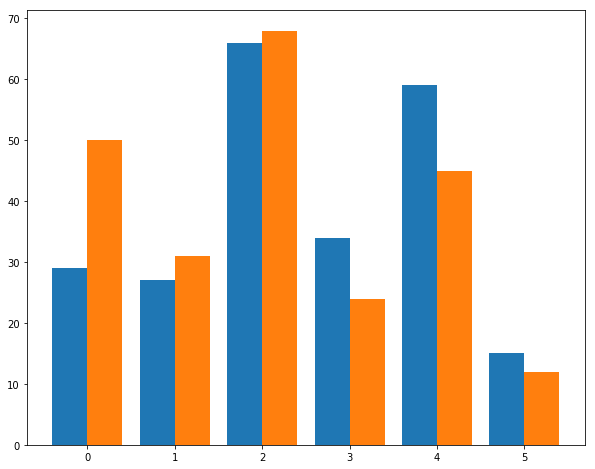

In [47]:
plt.subplots(nrows=1, ncols=1,figsize=(10,8))
width = 0.4
plt.bar(r1_count.index-width/2,r1_count,width= width, label = 'Rating 1')
plt.bar(r2_count.index+width/2,r2_count,width= width, label = 'Rating 2')

In [8]:
np.corrcoef(rating['r1'],rating['r2'])

array([[1.        , 0.80799819],
       [0.80799819, 1.        ]])

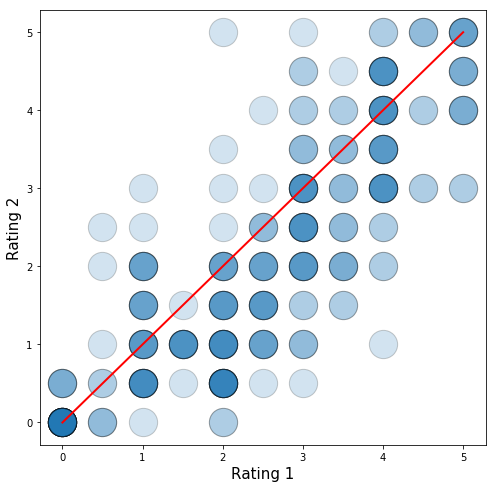

In [46]:
plt.subplots(nrows=1, ncols=1,figsize=(8,8))
plt.scatter(rating['r1'],rating['r2'],s=800,alpha=0.2,edgecolors='#000000')
plt.ylabel("Rating 2",size=15)
plt.xlabel('Rating 1',size=15)

plt.plot([0, 5], [0, 5], 'r-', lw=2)

plt.savefig('../figures/ratings_consistency.png',format='png')

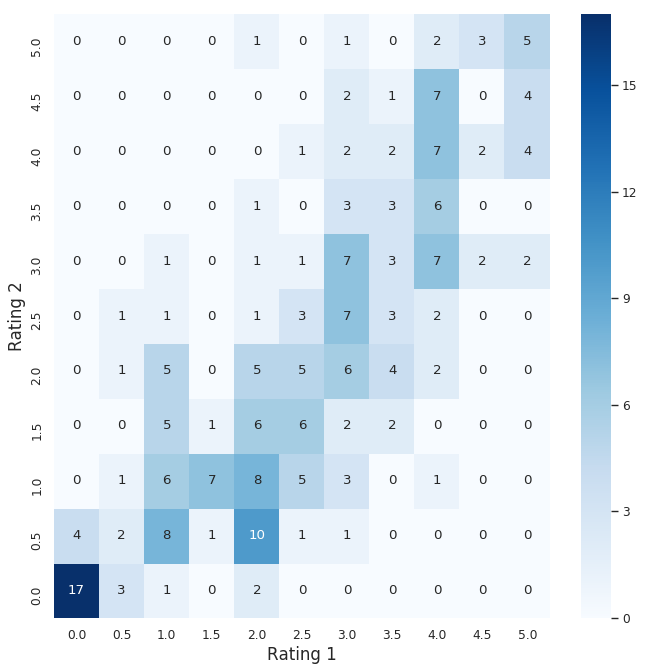

In [53]:
labels = [0, 0.5, 1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5]


mat = []
for i in labels:
    vec = []
    for j in labels:
        vec.append(len(rating[(rating.r2==i) & (rating.r1==j)]))
    mat.append(vec)
    
mat_df = pd.DataFrame(mat,columns=labels,index=labels)

plt.figure(figsize=(10, 10), dpi= 80, facecolor='w', edgecolor='k')
sns.set(font_scale=1)

ax = plt.axes()
sns.heatmap(mat_df,cmap="Blues",ax=ax,annot=True,fmt='.5g')

plt.ylabel("Rating 2",size=15)
plt.xlabel('Rating 1',size=15)
ax.invert_yaxis()

plt.savefig('../figures/ratings_consistency2.png',format='png')

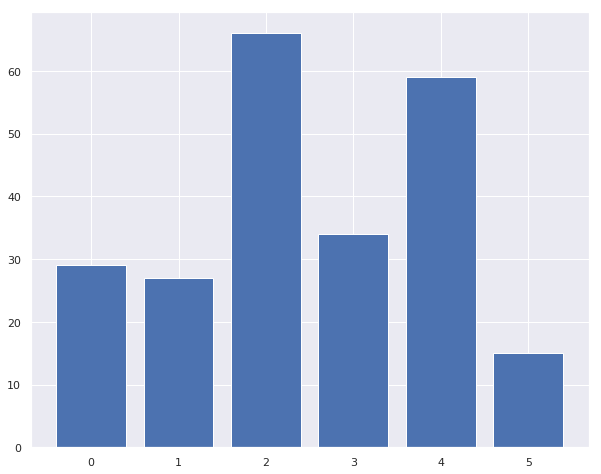

In [64]:
plt.subplots(nrows=1, ncols=1,figsize=(10,8))
width = 0.8
plt.bar(r1_count.index,r1_count,width= width, label = 'Rating 1')

plt.savefig('../figures/ratings_final.png',format='png')